In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 8
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot

from swifd import SwiModel

In [2]:
# space discretization
nlay = 1
ncol = 41
delx = 50
# time discretization
delt = 2000
nstep = 40
hfini = np.zeros(ncol)
hsini = np.zeros(ncol)
# boundary conditions
hleft = 0
hright = 0
# aquifer
k = 10 # horizontal hydraulic conductivity, m/d
S = 0.2 # storage coefficient, -
Se = 1e-4 # specific storage coef, m^(-1)
zt = 0 # aquifer top, m
zb = -50 # aquifer bottom, m
rhof = 1000 # freshwater density, kg/m3
rhos = 1025 # saltwater density, kg/m3
# source
N = 0.001
Qf = [[0, icol, N * delx] for icol in np.arange(ncol)]
# fixed
fixed = [[0, 0, hleft], [0, ncol - 1, hright]]

In [3]:
ml = SwiModel(nlay, ncol, delx, xleftc=-1000)
ml.tdis(nstep=1, delt=1, hfini=hfini, hsini=hsini)
ml.aquifer(k, S=0, Se=0, zb=zb, zt=zt, rhof=rhof, rhos=rhos) # zero storage means instantaneous steady state
ml.set_source(Qf)
ml.set_fixed(fixed, fixed)
hsol, zetasol = ml.simulate_freshonly()

iterations: 7


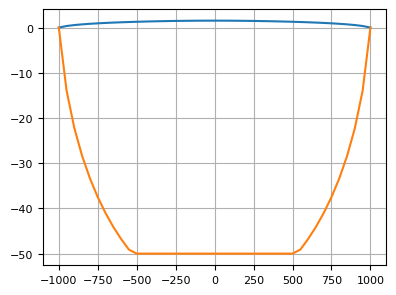

In [4]:
plt.plot(ml.xc, hsol[1, 0])
plt.plot(ml.xc, zetasol[1, 0])
plt.grid()

In [5]:
ml = SwiModel(nlay, ncol, delx)
ml.tdis(nstep=nstep, delt=delt, hfini=hfini, hsini=hsini)
ml.aquifer(k, S=S, Se=Se, zb=zb, zt=zt, rhof=rhof, rhos=rhos)
ml.set_source(Qf)
ml.set_fixed(fixed)
hsol, zetasol = ml.simulate_freshonly(silent=True)

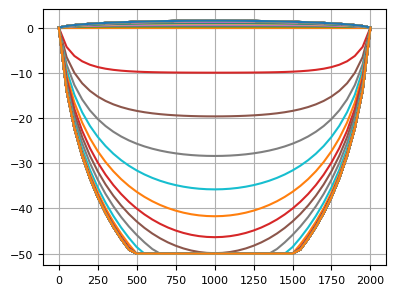

In [6]:
for i in range(nstep + 1):
    plt.plot(ml.xc, hsol[i, 0])
    plt.plot(ml.xc, zetasol[i, 0])
plt.grid()

In [7]:
istep = 7
budget = ml.budget_fresh_step(hsol[istep + 1], hsol[istep], np.zeros(ncol), np.zeros(ncol))
budget

,layer 0,total
Source,3.900000e+03,3.900000e+03
Fixed,-3.182293e+03,-3.182293e+03
GHB,0.000000e+00,0.000000e+00
Drain,0.000000e+00,0.000000e+00
Qtop,0.000000e+00,0.000000e+00
Qbot,0.000000e+00,0.000000e+00
storage_increase,7.177066e+02,7.177066e+02
in_min_out,7.177066e+02,7.177066e+02
balance,4.081357e-11,4.081357e-11


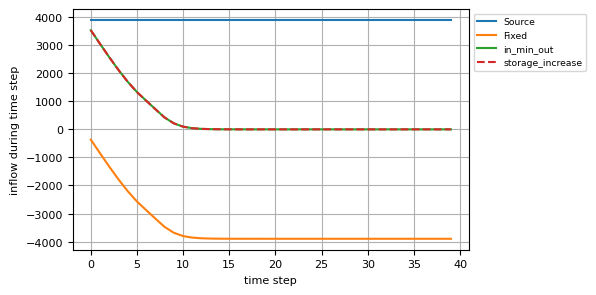

In [8]:
bud = ml.budget_fresh(hsol)
bud['layer 0'][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(figsize=(6, 3), grid=True, xlabel='time step', 
                    ylabel='inflow during time step', style=3 * ['-'] + ['--']).legend (bbox_to_anchor=(1.0, 1.0), fontsize='small');

In [9]:
# space discretization
nlay = 1
ncol = 41
delx = 50
# time discretization
delt = 2000
nstep = 40
hfini = np.zeros(ncol)
hsini = np.zeros(ncol)
# boundary conditions
hleft = 0
hright = 0
# aquifer
k = 10 # horizontal hydraulic conductivity, m/d
S = 0.2 # storage coefficient, -
Se = 1e-4 # specific storage coef, m^(-1)
zt = 0 * np.ones(ncol) # aquifer top, m
zb = -50 * np.ones(ncol) # aquifer bottom, m
rhof = 1000 # freshwater density, kg/m3
rhos = 1025 # saltwater density, kg/m3
# source
N = 0.001
Qf = [[0, icol, N * delx] for icol in np.arange(ncol)]
# fixed
fixed = [[0, 0, hleft], [0, ncol - 1, hright]]

In [10]:
ml = SwiModel(nlay, ncol, delx)
ml.tdis(nstep, delt, hfini, hsini)
ml.aquifer(k, S=S, Se=Se, zb=zb, zt=zt, rhof=rhof, rhos=rhos)
ml.set_source(Qf)
ml.set_fixed(fixed, fixed)
hfsol2, hssol2, zetasol2 = ml.simulate(silent=True)

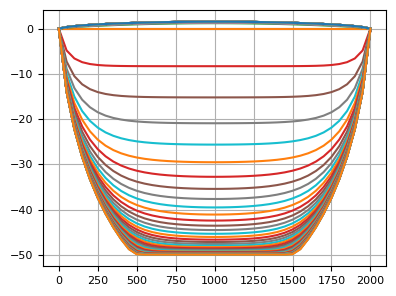

In [11]:
for i in range(nstep + 1):
    plt.plot(ml.xc, hfsol2[i, 0])
    plt.plot(ml.xc, zetasol2[i, 0])
plt.grid()

In [12]:
istep = 7
budget = ml.budget_fresh_step(hfsol2[istep + 1], hfsol2[istep], hssol2[istep + 1], hssol2[istep])
budget

,layer 0,total
Source,3.900000e+03,3.900000e+03
Fixed,-3.213466e+03,-3.213466e+03
GHB,0.000000e+00,0.000000e+00
Drain,0.000000e+00,0.000000e+00
Qtop,0.000000e+00,0.000000e+00
Qbot,0.000000e+00,0.000000e+00
storage_increase,6.865337e+02,6.865337e+02
in_min_out,6.865337e+02,6.865337e+02
balance,-3.660716e-11,-3.660716e-11


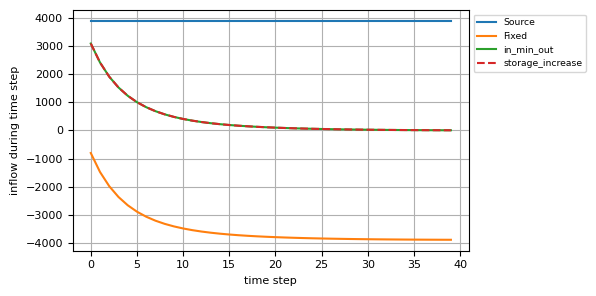

In [13]:
bud = ml.budget_fresh(hfsol2, hssol2)
bud['layer 0'][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(figsize=(6, 3), grid=True, xlabel='time step', 
                    ylabel='inflow during time step', style=3 * ['-'] + ['--']).legend (bbox_to_anchor=(1.0, 1.0), fontsize='small');

In [14]:
istep = 7
budget = ml.budget_salt_step(hssol2[istep + 1], hssol2[istep], hfsol2[istep + 1], hfsol2[istep])
budget

,layer 0,total
Source,0.000000e+00,0.000000e+00
Fixed,-6.865738e+02,-6.865738e+02
GHB,0.000000e+00,0.000000e+00
Drain,0.000000e+00,0.000000e+00
Qtop,0.000000e+00,0.000000e+00
Qbot,0.000000e+00,0.000000e+00
storage_increase,-6.865738e+02,-6.865738e+02
in_min_out,-6.865738e+02,-6.865738e+02
balance,-5.684342e-13,-5.684342e-13


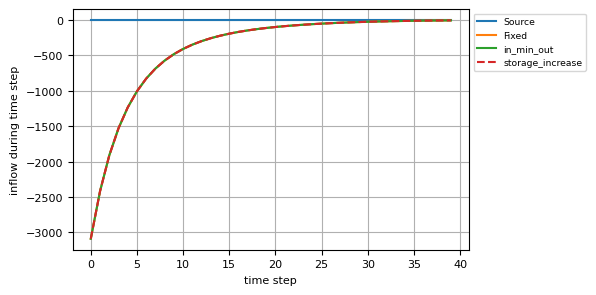

In [15]:
bud = ml.budget_salt(hfsol2, hssol2)
bud['layer 0'][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(figsize=(6, 3), grid=True, xlabel='time step', 
                    ylabel='inflow during time step',  style=3 * ['-'] + ['--']).legend (bbox_to_anchor=(1.0, 1.0), fontsize='small')

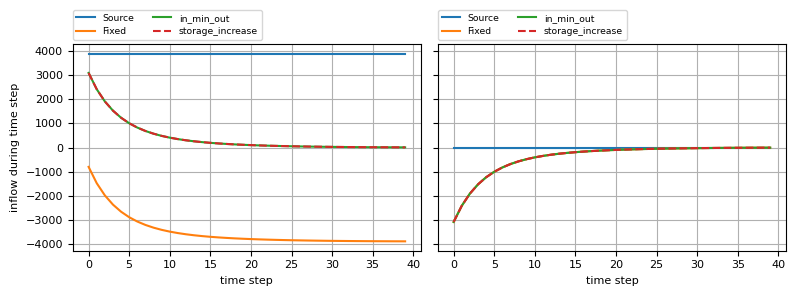

In [16]:
plt.figure(figsize=(8, 3))
ax1 = plt.subplot(121)
bud = ml.budget_fresh(hfsol2, hssol2)
bud['layer 0'][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax1, style=3 * ['-'] + ['--']).legend (loc=(0, 1.02), ncol=2, fontsize='small')
#
ax2 = plt.subplot(122, sharey=ax1)
bud = ml.budget_salt(hfsol2, hssol2)
bud['layer 0'][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax2, style=3 * ['-'] + ['--']).legend (loc=(0, 1.02), ncol=2, fontsize='small');

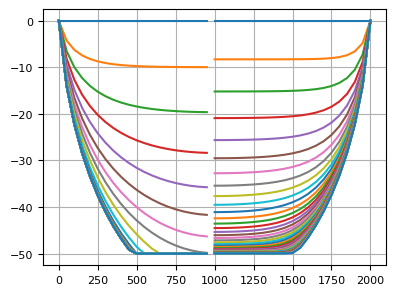

In [17]:
x = np.arange(0, ncol * delx, delx)
for i in range(nstep + 1):
    plt.plot(x[:ncol // 2], zetasol[i, 0, :ncol // 2], 'C' + str(i))
    plt.plot(x[ncol // 2:], zetasol2[i, 0, ncol // 2:], 'C' + str(i))
plt.grid()

In [18]:
# space discretization
nlay = 1
ncol = 41
delx = 50
# time discretization
delt = 2000
nstep = 40
hfini = np.zeros(ncol)
hsini = np.zeros(ncol)
# boundary conditions
hleft = 0
hright = 0
# aquifer
k = 10 # horizontal hydraulic conductivity, m/d
S = 0.2 # storage coefficient, -
Se = 1e-4 # specific storage coef, m^(-1)
zt = 0 * np.ones(ncol) # aquifer top, m
zb = -50 * np.ones(ncol) # aquifer bottom, m
rhof = 1000 # freshwater density, kg/m3
rhos = 1025 # saltwater density, kg/m3
# source
N = 0.001
Qf = [[0, icol, N * delx] for icol in np.arange(ncol)]
# fixed
fixed = [[0, 0, hleft], [0, ncol - 1, hright]]

In [19]:
ml = SwiModel(nlay, ncol, delx)
ml.tdis(nstep=1, delt=1, hfini=hfini, hsini=hsini)
ml.aquifer(k, S=0, Se=0, zb=zb, zt=zt, rhof=rhof, rhos=rhos)
ml.set_source(Qf=Qf)
ml.set_fixed(fixedf=fixed)
hf1, zeta1 = ml.simulate_freshonly(silent=True)
#
nstep2 = 40
delt2 = 1000
ml = SwiModel(nlay, ncol, delx)
ml.tdis(nstep=nstep2, delt=delt2, hfini=hf1[-1, 0], hsini=np.zeros(ncol))
ml.aquifer(k, S=S, Se=Se, zb=zb, zt=zt, rhof=rhof, rhos=rhos)
Qf2 = [[0, icol, 0.2 * N * delx] for icol in np.arange(ncol)]
ml.set_source(Qf2)
ml.set_fixed(fixedf=fixed, fixeds=fixed)
hf2, hs2, zeta2 = ml.simulate(silent=True)

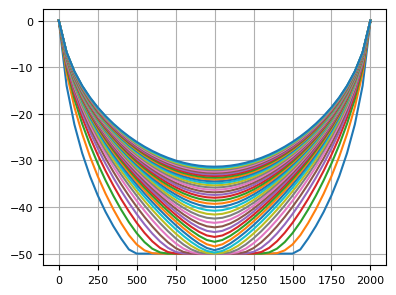

In [20]:
for i in range(nstep2 + 1):
    plt.plot(ml.xc, zeta2[i, 0])
plt.grid()

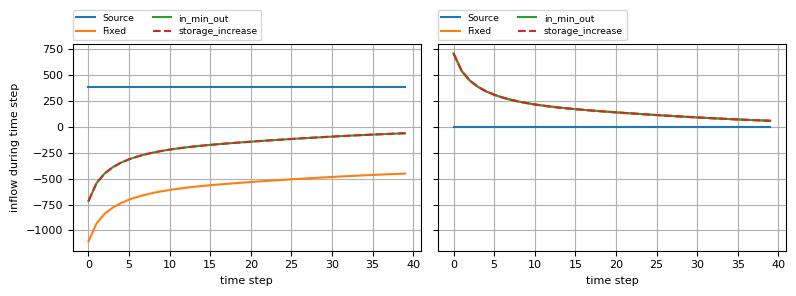

In [21]:
plt.figure(figsize=(8, 3))
ax1 = plt.subplot(121)
bud = ml.budget_fresh(hf2, hs2)
bud['layer 0'][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax1, style=3 * ['-'] + ['--']).legend (loc=(0, 1.02), ncol=2, fontsize='small')
#
ax2 = plt.subplot(122, sharey=ax1)
bud = ml.budget_salt(hf2, hs2)
bud['layer 0'][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax2, style=3 * ['-'] + ['--']).legend (loc=(0, 1.02), ncol=2, fontsize='small');

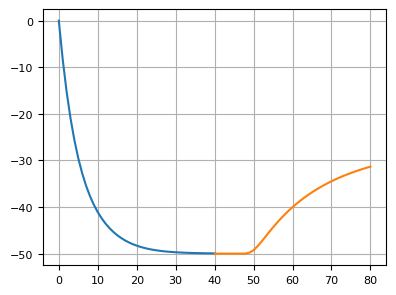

In [22]:
plt.plot(np.arange(nstep + 1), zetasol2[:, 0, 20])
plt.plot(np.arange(nstep2 + 1) + nstep, zeta2[:, 0, 20])
plt.grid()